In [1]:
%pip install opencv-python


  Using cached numpy-2.1.2-cp313-cp313-win_amd64.whl.metadata (59 kB)
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   - -------------------------------------- 1.6/38.8 MB 22.6 MB/s eta 0:00:02
   --- ------------------------------------ 3.4/38.8 MB 8.6 MB/s eta 0:00:05
   ---- ----------------------------------- 4.7/38.8 MB 7.9 MB/s eta 0:00:05
   ----- ---------------------------------- 5.2/38.8 MB 7.1 MB/s eta 0:00:05
   ------ --------------------------------- 6.0/38.8 MB 6.1 MB/s eta 0:00:06
   ------- -------------------------------- 6.8/38.8 MB 5.7 MB/s eta 0:00:06
   ------- -------------------------------- 7.6/38.8 MB 5.5 MB/s eta 0:00:06
   -------- ------------------------------- 8.7/38.8 MB 5.3 MB/s eta 0:00:06
   --------- ------------------------------ 9.7/38.8 MB 5.3 MB/s eta 0:00:06
   ----------- ---------------------------- 10.7/38.8 MB 5.3 MB/s eta 0:00:06
   ------------ --------------------------- 12.1/38.8 MB 5.4 MB/s eta 0:00:05
   ------

In [3]:
%pip install pandas numpy

  Using cached pandas-2.2.3-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.3-cp313-cp313-win_amd64.whl (11.5 MB)
Using cached pytz-2024.2-py2.py3-none-any.whl (508 kB)
Using cached tzdata-2024.2-py2.py3-none-any.whl (346 kB)
Note: you may need to restart the kernel to use updated packages.


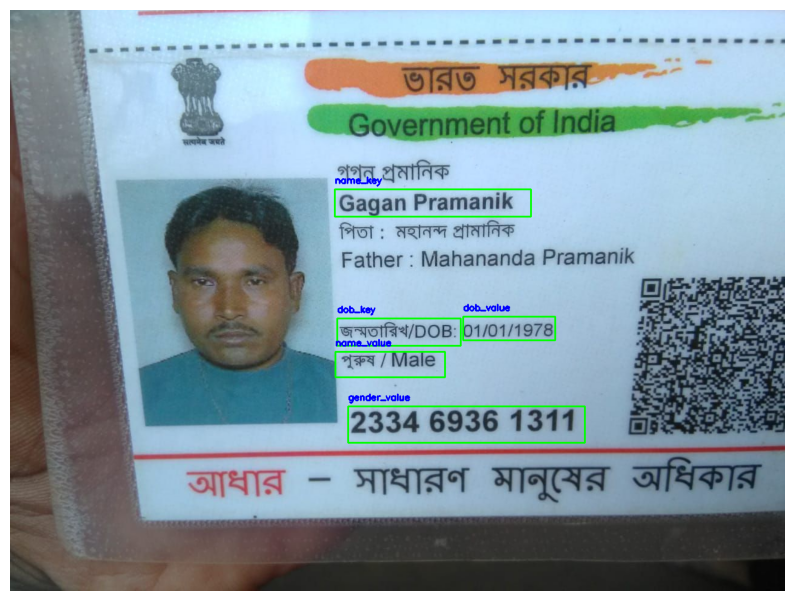

In [7]:
import cv2
import os
import matplotlib.pyplot as plt

# Path to your dataset
image_dir = "static/aadhar/images"
label_dir = "static/aadhar/labels"
classes_file = "static/aadhar/labels/classes.txt"

# Read class names from the classes.txt file
with open(classes_file, "r") as f:
    class_names = f.read().strip().split('\n')

# Function to read YOLO label file and extract bounding boxes
def read_yolo_labels(label_path):
    with open(label_path, "r") as f:
        boxes = [line.strip().split() for line in f.readlines()]
        return boxes

# Function to plot image with bounding boxes
def plot_image_with_boxes(image_path, label_path):
    # Load image
    image = cv2.imread(image_path)
    h, w, _ = image.shape
    
    # Read the label file
    boxes = read_yolo_labels(label_path)
    
    for box in boxes:
        class_id, x_center, y_center, width, height = map(float, box)
        class_id = int(class_id)
        
        # Convert normalized coordinates to pixel coordinates
        x_center *= w
        y_center *= h
        width *= w
        height *= h
        
        # Calculate the top-left corner of the bounding box
        x1 = int(x_center - width / 2)
        y1 = int(y_center - height / 2)
        x2 = int(x_center + width / 2)
        y2 = int(y_center + height / 2)
        
        # Draw the bounding box on the image
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        label = f"{class_names[class_id]}"
        
        # Draw label on top of the bounding box
        cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
    
    # Convert image from BGR (OpenCV format) to RGB (for Matplotlib)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Display the image with bounding boxes
    plt.figure(figsize=(10, 10))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

# Visualize a specific image and its labels
image_filename = "6.png"  # Replace with an actual image file
label_filename = "6.txt"  # Replace with the corresponding label file

# Full paths
image_path = os.path.join(image_dir, image_filename)
label_path = os.path.join(label_dir, label_filename)

# Plot the image with its YOLO bounding boxes
plot_image_with_boxes(image_path, label_path)


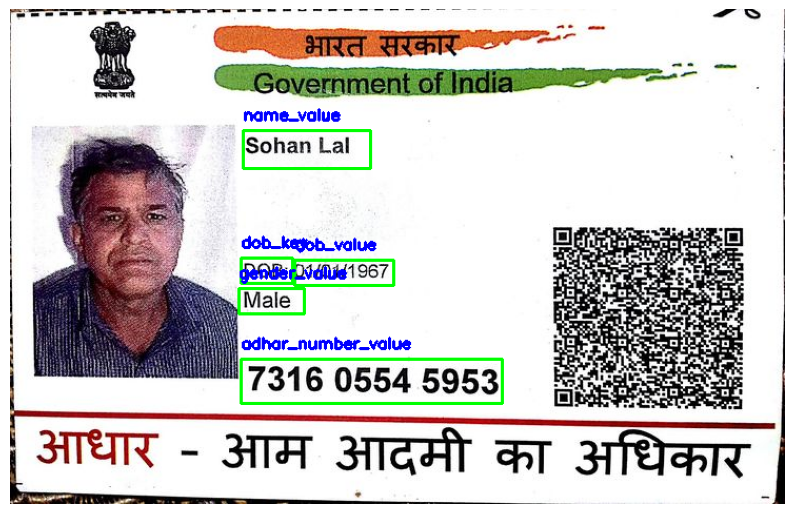

In [8]:
import cv2
import os
import matplotlib.pyplot as plt
import json

# Path to your dataset
image_dir = "static/aadhar/images"
label_dir = "static/aadhar/labels"
notes_file = "static/aadhar/notes.json"  # Path to the notes.json file

# Read class names from notes.json
with open(notes_file, "r") as f:
    notes_data = json.load(f)
    
# Extract the categories (class IDs and names)
categories = notes_data['categories']
class_names = {category['id']: category['name'] for category in categories}

# Function to read YOLOv8 label file and extract bounding boxes
def read_yolo_labels(label_path):
    with open(label_path, "r") as f:
        boxes = [line.strip().split() for line in f.readlines()]
        return boxes

# Function to plot image with bounding boxes
def plot_image_with_boxes(image_path, label_path):
    # Load image
    image = cv2.imread(image_path)
    h, w, _ = image.shape
    
    # Read the label file
    boxes = read_yolo_labels(label_path)
    
    for box in boxes:
        class_id, x_center, y_center, width, height = map(float, box)
        class_id = int(class_id)
        
        # Convert normalized coordinates to pixel coordinates
        x_center *= w
        y_center *= h
        width *= w
        height *= h
        
        # Calculate the top-left corner of the bounding box
        x1 = int(x_center - width / 2)
        y1 = int(y_center - height / 2)
        x2 = int(x_center + width / 2)
        y2 = int(y_center + height / 2)
        
        # Draw the bounding box on the image
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        
        # Use class_names from JSON
        label = class_names.get(class_id, "Unknown")
        
        # Draw label on top of the bounding box
        cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
    
    # Convert image from BGR (OpenCV format) to RGB (for Matplotlib)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Display the image with bounding boxes
    plt.figure(figsize=(10, 10))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

# Visualize a specific image and its labels
image_filename = "3.png"  # Replace with an actual image file
label_filename = "3.txt"  # Replace with the corresponding label file

# Full paths
image_path = os.path.join(image_dir, image_filename)
label_path = os.path.join(label_dir, label_filename)

# Plot the image with its YOLOv8 bounding boxes
plot_image_with_boxes(image_path, label_path)
